In [2]:
import pandas as pd
import numpy as np
from argopy import DataFetcher as ArgoDataFetcher
argo_loader = ArgoDataFetcher(cache=True)
#
#Query surface and 1000m temp in Mediterranee with argopy
df1 = argo_loader.region([-1.2,29.,28.,46.,0,10.,'2009-12','2020-01']).to_xarray()
df2 = argo_loader.region([-1.2,29.,28.,46.,975.,1025.,'2009-12','2020-01']).to_xarray()
#
df1

<xarray.Dataset>
Dimensions:          (N_POINTS: 180216)
Coordinates:
  * N_POINTS         (N_POINTS) int64 0 1 2 4 5 ... 202601 202602 202603 202604
    LATITUDE         (N_POINTS) float64 38.38 38.38 40.47 ... 34.54 34.54 34.54
    LONGITUDE        (N_POINTS) float64 7.736 7.736 4.388 ... 27.07 27.07 27.07
    TIME             (N_POINTS) datetime64[ns] 2009-12-01T06:46:19 ... 2019-12-31T23:02:30
Data variables:
    CYCLE_NUMBER     (N_POINTS) int64 249 249 48 9 9 57 ... 133 133 133 133 133
    DATA_MODE        (N_POINTS) <U1 'D' 'D' 'D' 'D' 'D' ... 'R' 'R' 'R' 'R' 'R'
    DIRECTION        (N_POINTS) <U1 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_POINTS) int64 6900453 6900453 ... 6902718 6902718
    POSITION_QC      (N_POINTS) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    PRES             (N_POINTS) float64 4.5 9.0 9.0 4.0 9.2 ... 7.1 8.0 8.9 9.8
    PRES_QC          (N_POINTS) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    PSAL             (N_POINTS) float64 37.5 37.5 37.95 ... 39.31 39.31 39.31
    PSAL_QC          (N_POINTS) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    TEMP             (N_POINTS) float64 17.47 17.47 17.61 ... 17.78 17.78 17.78
    TEMP_QC          (N_POINTS) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    TIME_QC          (N_POINTS) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         http://www.ifremer.fr/erddap
    Fetched_by:           kbalem
    Fetched_date:         2020/06/11
    Fetched_constraints:  phy_[x=-1.20/29.00; y=28.00/46.00; z=0.0/10.0; t=20...
    Fetched_url:          http://www.ifremer.fr/erddap/tabledap/ArgoFloats.cs...
    cache:                /export/home/kbalem/.cache/argopy/ERargo_phy_35880_...
    history:              Variables filtered according to DATA_MODE; Variable...

In [3]:
#Create new datasets to plot
daterange=np.arange('2010-01-01','2020-01-03',dtype='datetime64[7D]') #weeks
dayoftheyear=pd.DatetimeIndex(np.array(daterange,dtype='datetime64[D]')+3).dayofyear #middle of the week
activeyear=pd.DatetimeIndex(np.array(daterange,dtype='datetime64[D]')+3).year 

tsurf=np.zeros(len(daterange))
t1000=np.zeros(len(daterange))

for i in range(len(daterange)):
    i1=(df1['TIME']>=daterange[i])&(df1['TIME']<daterange[i]+7)    
    i2=(df2['TIME']>=daterange[i])&(df2['TIME']<daterange[i]+7)    
    tsurf[i]=df1.where(i1,drop=True)['TEMP'].mean().values
    t1000[i]=df2.where(i2,drop=True)['TEMP'].mean().values
    
d = {'date': np.array(daterange,dtype='datetime64[D]'), 'tsurf': tsurf, 't1000': t1000}
ndf = pd.DataFrame(data=d)
ndf.head()

,date,tsurf,t1000
0,2009-12-31,15.725000,13.306133
1,2010-01-07,15.530414,13.315658
2,2010-01-14,15.307378,13.300347
3,2010-01-21,14.954195,13.300647
4,2010-01-28,14.708816,13.300274


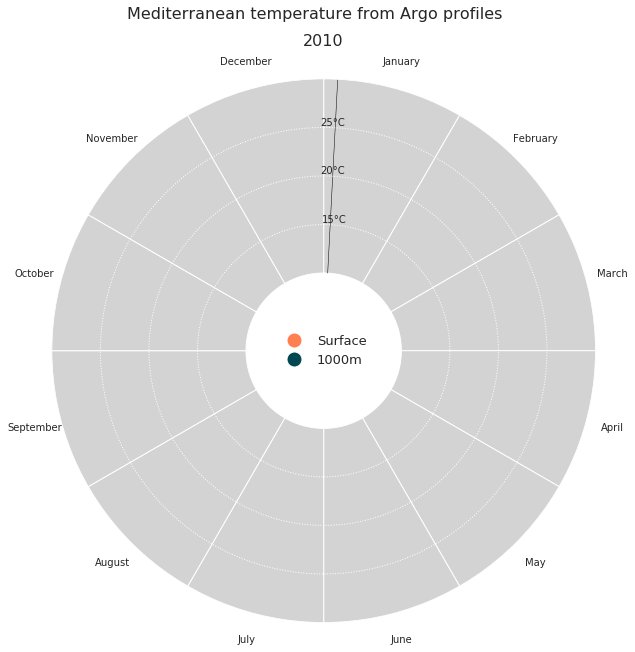

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['xtick.major.pad']='17'
plt.rcParams["axes.axisbelow"] = False
matplotlib.rc('axes',edgecolor='w')
from matplotlib.lines import Line2D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

big_angle= 360/12
date_angle=((360/365)*dayoftheyear)*np.pi/180
inner=10
outer=30
ocean_color = ["#ff7f50","#004752"]

def dress_axes(ax):
    ax.set_facecolor('w')
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    middles=np.arange(big_angle/2 ,360, big_angle)*np.pi/180
    ax.set_xticks(middles)
    ax.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August','September','October','November','December'])
    ax.set_yticks([15,20,25])
    ax.set_yticklabels(['15°C','20°C','25°C'])
    ax.set_rlabel_position(359)
    ax.tick_params(axis='both',color='w')
    plt.grid(None,axis='x')
    plt.grid(axis='y',color='w', linestyle=':', linewidth=1)
    bars = ax.bar(middles, outer, width=big_angle*np.pi/180, bottom=inner, color='lightgray', edgecolor='w',zorder=0)
    plt.ylim([2,outer])
    legend_elements = [Line2D([0], [0], marker='o', color='w', label='Surface', markerfacecolor=ocean_color[0], markersize=15),
                       Line2D([0], [0], marker='o', color='w', label='1000m', markerfacecolor=ocean_color[1], markersize=15),
                       ]
    ax.legend(handles=legend_elements, loc='center', fontsize=13, frameon=False)
    plt.suptitle('Mediterranean temperature from Argo profiles',fontsize=16,horizontalalignment='center')

def update(i):       
    #
    ax.cla()
    #REDRESSING AXES
    dress_axes(ax)
    #THIS CHANGES
    i0=np.max([i-51,0])
        
    ax.plot(date_angle[i0:i+1], ndf['tsurf'][i0:i+1],'-',color=ocean_color[0],alpha=1.0,linewidth=5)     
    ax.plot(date_angle[0:i+1], ndf['tsurf'][0:i+1],'-',color=ocean_color[0],linewidth=0.7)     
    
    ax.plot(date_angle[i0:i+1], ndf['t1000'][i0:i+1],'-',color=ocean_color[1],alpha=1.0,linewidth=5)     
    ax.plot(date_angle[0:i+1], ndf['t1000'][0:i+1],'-',color=ocean_color[1],linewidth=0.7)     
    
    ax.plot([date_angle[i],date_angle[i]],[inner,outer],'k-',linewidth=0.5)
    plt.title(str(activeyear[i]),fontsize=16,horizontalalignment='center')

    
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, polar=True)

dress_axes(ax)
#update(322)
anim = FuncAnimation(fig, update, interval=40, frames=len(daterange)-1, repeat=False)    
#anim.save('ArgopyUseCase_MedTempAnimation.mp4')   
HTML(anim.to_html5_video())
#plt.show()
